# Predicting Peak Player Activity: Optimizing Game Server Resources

## Group Members: Sungjun Lee, Prima Cheung, Sayra Arij, Mishaa Murugathass

## Introduction

Predicting player activity patterns is crucial for optimizing server resource allocation, reducing latency, and improving overall gameplay satisfaction. Studies have shown that load prediction services can anticipate future game world entity distributions from historical data, enabling more efficient resource provisioning. Additionally, analyzing player behavior and gaming patterns allows for smarter allocation of resources, as metrics such as peak usage times and session lengths play a crucial role in this process.

This study aims to predict peak hours of player activity using historical session data from a video game research server. The dataset used in this project consists of two files: sessions.csv and players.csv. The focus of this report is on sessions.csv, which records play sessions from a video game research server. Key attributes include unique player identifiers, session start and end times, and Unix timestamp formats. However, potential issues such as missing end_time values, timestamp granularity, and data collection bias may affect analysis accuracy. The players.csv file provides additional information about the players themselves. It comprises 196 rows and 7 columns, including variables such as player experience, subscription status, total play hours, and demographic information.

The question we are asking is: **Can we predict the peak hours of player activity using historical session data?** Understanding peak play hours enables server administrators to allocate resources efficiently, ensuring smooth gameplay experiences without overloading or underutilizing server capacity. By leveraging historical session data, this study aims to develop a predictive model to inform decision-making in server management and resource distribution.



## Methods & Results

#### Load and Prepare Data

In [4]:
library(tidyverse)

sessions <- read_csv("https://raw.githubusercontent.com/anderpudding/dsci-project-005-16/refs/heads/main/data/sessions.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Wrangle and Tidy Data

In [5]:
sessions <- sessions |>
    mutate(start_time = strptime(start_time, "%d/%m/%Y %H:%M"),
        end_time = strptime(end_time, "%d/%m/%Y %H:%M"),
        session_duration = as.numeric(difftime(end_time, start_time, units = "mins")))

#### Summary Statistics

In [6]:
summary_stats <- sessions |>
    summarise(mean_session_duration = mean(session_duration, na.rm = TRUE),
        mean_players_per_hour = n() / length(unique(format(start_time, "%H"))))

summary_stats

mean_session_duration,mean_players_per_hour
<dbl>,<dbl>
50.85845,66.73913


#### Extract Time Features

In [7]:
sessions <- sessions |>
    mutate(hour = as.numeric(format(start_time, "%H")),
        day_of_week = weekdays(as.Date(start_time)))

#### Visualization 1: Player Activity by Hour

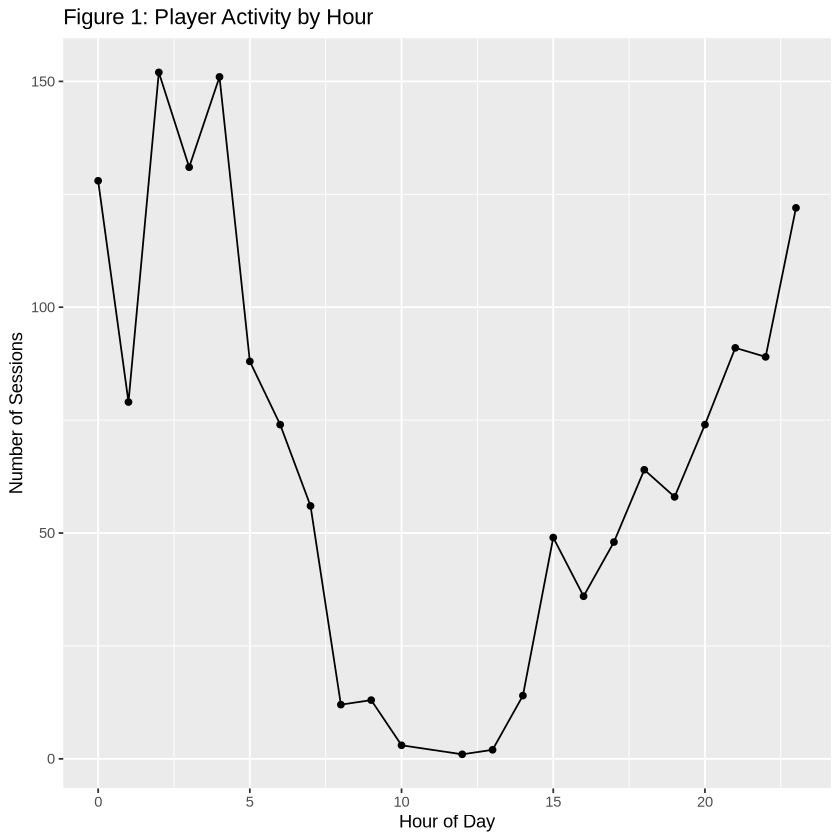

In [8]:
hourly_counts <- sessions |> 
    group_by(hour) |> 
    summarise(player_count = n())

ggplot(hourly_counts, aes(x = hour, y = player_count)) +
    geom_line() +
    geom_point() +
    labs(title = "Figure 1: Player Activity by Hour", x = "Hour of Day", y = "Number of Sessions")

#### Visualization 2: Player Activity by Day of Week

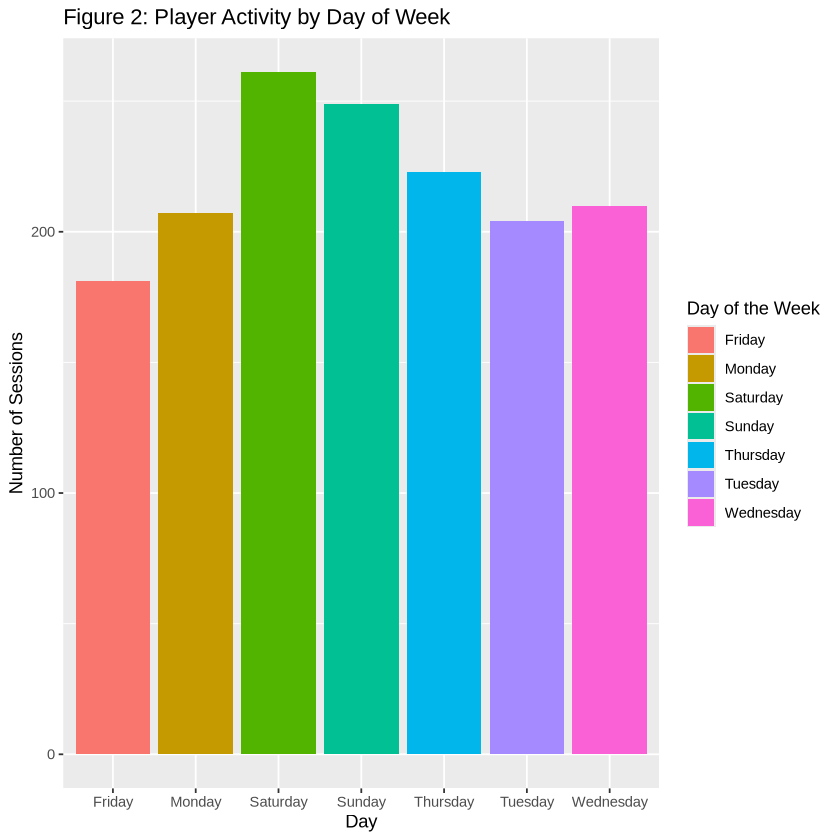

In [12]:
daily_counts <- sessions |> 
    group_by(day_of_week) |> 
    summarise(player_count = n())

ggplot(daily_counts, aes(x = day_of_week, y = player_count, fill = day_of_week)) +
    geom_bar(stat = "identity") +
    labs(title = "Figure 2: Player Activity by Day of Week", x = "Day", y = "Number of Sessions", fill = "Day of the Week")

## Discussion

From the analysis, we have found meaningful trends to help our study predict the peak hours. From the historical data, it reveals that the player's activity rises significantly after 1AM and then drops substantially before 5AM. From figure 1, it is evident that the lowest number of sessions happens in the afternoon and then slowly increases again after 2PM. Given that between those hours, most people are either busy with school or work. This pattern is further proved with figure 2, due to the number of sessions being the highest on Saturdays, followed by Sundays. 

These findings were expected as it follows the periods of time where people are free and able to do their leisure activities. It was more expected to see the peak hours of the number of sessions to be during the evenings. Therefore, it was a little surprising for the number of sessions to be highest around midnight. Although it confirmed our predictions on the weekends to have the highest number of sessions. 

This informs us that weekends and times around midnight is where we need to ensure that the number of licenses on hand is sufficiently large to accommodate that nearly all players can connect and play without disruption. By focusing on past data, we now have more information to have more smoother games during the busiest times. The implications of these findings can further help us to optimize resource allocation, reduce server lag, and improve the overall player experience by being better prepared for peak demand.

Future questions that may arise from our found data may be: How does specific player demographics (e.g., experience level or subscription status) further influence peak times? What role does social behavior (e.g., playing with friends or in teams) play in peak times? By looking at additional reasons that may affect peak hours is a route that may be helpful to better understand player habits.